<a href="https://colab.research.google.com/github/YOGALAKSHUMI/CREDIT-CARD-FRAUD-DETECTION-USING-MACHINE-LEARNING-IN-XGBOOST-ALGORITHM/blob/main/credit_card_fraud_detection_using_ML_in_XGBoost_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/creditcard.csv')

In [ ]:
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Statistical information about the variables
df.describe().round()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,...,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,94814.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,88.0,0.0
std,47488.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,250.0,0.0
min,0.0,-56.0,-73.0,-48.0,-6.0,-114.0,-26.0,-44.0,-73.0,-13.0,...,-35.0,-11.0,-45.0,-3.0,-10.0,-3.0,-23.0,-15.0,0.0,0.0
25%,54202.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,...,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,0.0
50%,84692.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,22.0,0.0
75%,139320.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0
max,172792.0,2.0,22.0,9.0,17.0,35.0,73.0,121.0,20.0,16.0,...,27.0,11.0,23.0,5.0,8.0,4.0,32.0,34.0,25691.0,1.0


In [ ]:
#Statistical information in each class
print ('Non Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 0].describe(),2))
print ()
print ()
print ('Fraud % ',round(df['Class'].value_counts()[1]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 1].describe(),2))

Non Fraud %  99.83

count    284315.00
mean         88.29
std         250.11
min           0.00
25%           5.65
50%          22.00
75%          77.05
max       25691.16
Name: Amount, dtype: float64


Fraud %  0.17

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64


Non Fraud %  99.83
Fraud %  0.17


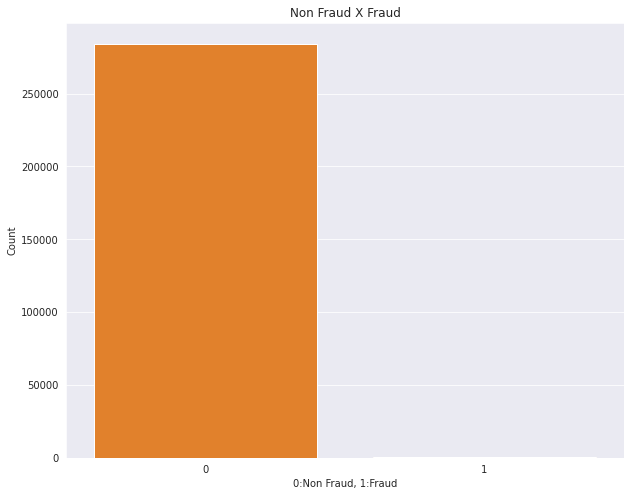

In [ ]:
#Comparing the amount value of normal transactions versus fraud

plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(), palette=["C1"])
plt.title('Non Fraud X Fraud')            
plt.ylabel('Count')
plt.xlabel('0:Non Fraud, 1:Fraud')
print ('Non Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ('Fraud % ',round(df['Class'].value_counts()[1]/len(df)*100,2));

In [ ]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30:].columns

In [ ]:
data_features = df[feature_names]
data_target = df[target]

In [ ]:
feature_names

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [44]:
def train_test_rmse(x,y):
  x = Iris_data[x]
  y = Iris_data[y]
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target,
                                                    train_size = 0.70, test_size = 0.30)  


In [45]:
from xgboost.sklearn import XGBClassifier
#Buliding the XGBoost Model
xg = XGBClassifier()

In [53]:
#Training the Model
xg.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

XGBClassifier(objective='multi:softprob')

In [59]:
#Confusion Matrix - Model performance measures

def PrintStats(camt, y_train, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

In [60]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
cmat, pred = RunModel(xg, X_train, y_train, X_test, y_test)

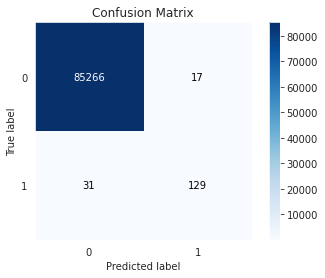

In [66]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [67]:
accuracy_score(y_test, pred)

0.9994382219725431

In [68]:
from sklearn.metrics import classification_report
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.88      0.81      0.84       160

    accuracy                           1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



Applying the undersampling technique

In [72]:
# The function "len" counts the number of classes = 1 and saves it as an object "fraud_rec
fraud_records = len(df[df.Class == 1])

In [73]:
# Defines the index for fraud and non-fraud in the lines:
fraud_indices = df[df.Class == 1].index
normal_indices = df[df.Class == 0].index

In [79]:
from xgboost.training import train
# Randomly collect equal samples of each type:
under_sample_indices = np.random.choice(normal_indices, fraud_records, False)
df_undersampled = df.iloc[np.concatenate([fraud_indices, under_sample_indices]),:]
X_undersampled = df_undersampled.iloc[:,1:30]
Y_undersampled = df_undersampled.Class
X_undersampled_train, X_undersampled_test, Y_undersampled_train, Y_undersampled_test = train_test_split(X_undersampled, Y_undersampled, test_size=0.3)

Using the "new" clasifier for balanced data

In [80]:
xg_undersampled = xgb.XGBClassifier()
cmat, pred = RunModel(xg_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)
PrintStats(cmat, Y_undersampled_test, pred)

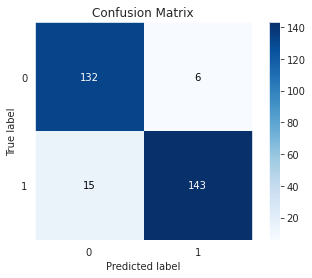

In [81]:
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred)

In [82]:
accuracy_score(Y_undersampled_test, pred)

0.9290540540540541

In [83]:
print (classification_report(Y_undersampled_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       138
           1       0.96      0.91      0.93       158

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



Using the "new" classifier for the original data test

In [84]:
xg = xgb.XGBClassifier()
cmat, pred = RunModel(xg, X_undersampled_train, Y_undersampled_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

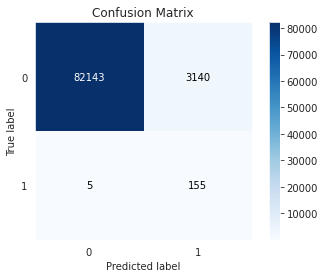

In [85]:
skplt.metrics.plot_confusion_matrix(y_test,pred)

In [86]:
accuracy_score(y_test, pred)

0.9631918354926676

In [87]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85283
           1       0.05      0.97      0.09       160

    accuracy                           0.96     85443
   macro avg       0.52      0.97      0.54     85443
weighted avg       1.00      0.96      0.98     85443



Mesurement of classifeir performance through the ROC and AUC curve



In [88]:
from sklearn import metrics

In [89]:
#Creating XGBoost model
clf = xgb.XGBClassifier()
clf.fit(X_undersampled_train, Y_undersampled_train)
y_pred = clf.predict(X_test)

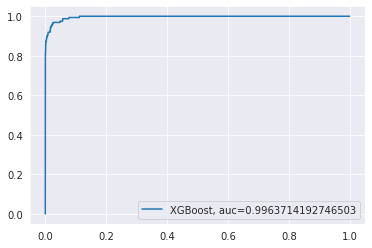

In [95]:
#AUC Curve XGBoost 
y_pred_probablity = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ =metrics.roc_curve(y_test, y_pred_probablity)
auc = metrics.roc_auc_score(y_test, y_pred_probablity)
plt.plot(fpr,tpr,label="XGBoost, auc="+str(auc))
plt.legend(loc=4)
plt.show()